In [2]:
import os.path
from torch.utils.data import DataLoader
from project_function import SummaryDataSet, split_data, TitlePartyModel, run_n_epochs, plot_losses
import torch

In [3]:
token_data_path = os.path.join(os.getcwd(), "..", "data", "tokenized")

In [4]:
resample_train_files, resample_validation_files, resample_test_files = split_data(token_data_path, "shrunk", 0.6)

KeyboardInterrupt: 

In [4]:
print(f'{len(resample_train_files)} training files, {len(resample_validation_files)} validation files, {len(resample_test_files)} test files')

1217 training files, 392 validation files, 378 test files


In [10]:
single_resample_train_dataset = SummaryDataSet(resample_train_files, fixed_idx=True, allow_gpu=True, col_name="input_shrunk")
single_resample_validation_dataset = SummaryDataSet(resample_validation_files, fixed_idx=True, allow_gpu=True, col_name="input_shrunk")
single_resample_test_dataset = SummaryDataSet(resample_test_files, fixed_idx=True, allow_gpu=True, col_name="input_shrunk")

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392983-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392984-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392985-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392986-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392990-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392992-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392995-shrunk.pkl
loading C:\Users\benja\git-projects\bitbu

In [11]:
single_train_dataloader = DataLoader(single_resample_train_dataset, batch_size=1, shuffle=False)
#validate_dataloader = DataLoader(maxpool_validation_dataset, batch_size=1, shuffle=False)
single_validate_dataloader = DataLoader(single_resample_test_dataset, batch_size=1, shuffle=False)
single_test_dataloader = DataLoader(single_resample_train_dataset, batch_size=1, shuffle=False)

In [12]:
num_epochs = 10
single_resample_model = TitlePartyModel()
if torch.cuda.is_available():
    single_resample_model.cuda()
single_loss_fun_ms3e = torch.nn.MSELoss()
single_rms_optimizer = torch.optim.RMSprop(single_resample_model.parameters(), lr=0.01, momentum=0.9)
single_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(single_rms_optimizer, milestones=range(2,num_epochs,2), gamma=0.95)

In [13]:
torch.autograd.set_detect_anomaly(True)
single_checkpoint, single_train_losses, single_validation_losses = run_n_epochs(num_epochs,
                                                          single_resample_model,
                                                          single_loss_fun_ms3e,
                                                          single_rms_optimizer,
                                                          single_train_dataloader,
                                                          single_validate_dataloader,
                                                          "resample_single",
                                                          single_lrd_schedulers)

epoch 0
turn on training
running one epoch
data index 0


C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\project_function.py:31: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(x)


tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.2784, 0.2285, 0.2157, 0.2774]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.17407910525798798
turn off training
epoch loss 0.17407910525798798
applying model.eval()
LOSS train 0.17407910525798798 valid 7.482551497893855e-14
stepping scheduler
epoch 1
turn on training
running one epoch
data index 0
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[1.0000e+00, 7.2336e-08, 8.4430e-08, 2.4406e-07]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 7.482551497893855e-14
turn off training
epoch loss 7.482551497893855e-14
applying model.eval()
LOSS train 7.482551497893855e-14 valid 1.773101160205601e-24
stepping scheduler
epoch 2
turn on training
running one epoch
data index 0
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[1.0000e+00, 7.1830e-13, 8.3840e-13, 2.4235e-12]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 1.773101160205601e-24
turn off training
epoch loss

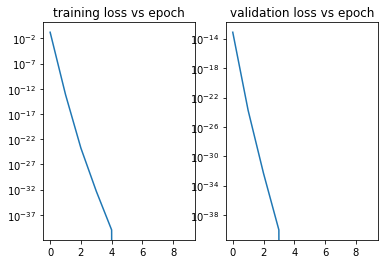

In [14]:
plot_losses(single_train_losses, single_validation_losses)

In [18]:
full_resample_train_dataset = SummaryDataSet(resample_train_files, fixed_idx=False, allow_gpu=True, col_name="input_shrunk")
full_resample_validation_dataset = SummaryDataSet(resample_validation_files, fixed_idx=False, allow_gpu=True, col_name="input_shrunk")
full_resample_test_dataset = SummaryDataSet(resample_test_files, fixed_idx=False, allow_gpu=True, col_name="input_shrunk")
fulL_train_dataloader = DataLoader(full_resample_train_dataset, batch_size=1, shuffle=True)
#validate_dataloader = DataLoader(maxpool_validation_dataset, batch_size=1, shuffle=False)
full_validate_dataloader = DataLoader(full_resample_validation_dataset, batch_size=1, shuffle=False)
full_test_dataloader = DataLoader(full_resample_test_dataset, batch_size=1, shuffle=False)

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392983-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392984-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392985-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392986-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392990-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392992-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392995-shrunk.pkl
loading C:\Users\benja\git-projects\bitbu

In [22]:
num_epochs = 100
resample_full_model = TitlePartyModel()
if torch.cuda.is_available():
    resample_full_model.cuda()
full_loss_fun_ms3e = torch.nn.MSELoss()
full_rms_optimizer = torch.optim.RMSprop(resample_full_model.parameters(), lr=0.01, momentum=0.9)
full_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(full_rms_optimizer, milestones=range(2,num_epochs,2), gamma=0.95)

In [23]:
full_checkpoint, full_train_losses, full_validation_losses = run_n_epochs(num_epochs,
                                                          resample_full_model,
                                                          full_loss_fun_ms3e,
                                                          full_rms_optimizer,
                                                          fulL_train_dataloader,
                                                          full_validate_dataloader,
                                                          "resample_full",
                                                          full_lrd_schedulers)

epoch 0
turn on training
running one epoch
data index 0
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.3610, 0.1662, 0.1535, 0.3192]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.1403384953737259
data index 1
data index 2
data index 3
data index 4
data index 5
data index 6
data index 7
data index 8
data index 9
data index 10
data index 11
data index 12
data index 13
data index 14
data index 15
data index 16
data index 17
data index 18
data index 19
data index 20
data index 21
data index 22
data index 23
data index 24
data index 25
data index 26
data index 27
data index 28
data index 29
data index 30
data index 31
data index 32
data index 33
data index 34
data index 35
data index 36
data index 37
data index 38
data index 39
data index 40
data index 41
data index 42
data index 43
data index 44
data index 45
data index 46
data index 47
data index 48
data index 49
data index 50
data index 51
data index 52
data index 53
data index 54
data index 55
data index

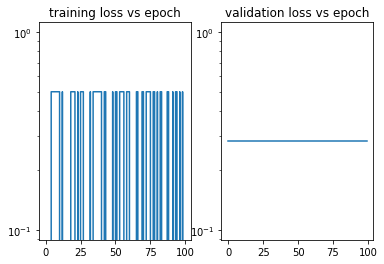

In [24]:
plot_losses(full_train_losses, full_validation_losses)